In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# matplotlib 한글 폰트 설정
from matplotlib import rc
rc('font', family='AppleGothic') 		
plt.rcParams['axes.unicode_minus'] = False  

In [14]:
lonely_df = pd.read_csv("./data/고독사_발생현황.csv", encoding='utf-8')
total_df = pd.read_csv("./data/전체_인구현황.csv", encoding='utf-8')

In [9]:
lonely_df

,연령별(1),2017,2017.1,2017.2,2017.3,2018,2018.1,2018.2,2018.3,2019,...,2021.2,2021.3,2022,2022.1,2022.2,2022.3,2023,2023.1,2023.2,2023.3
0,연령별(1),계,남자,여자,미상,계,남자,여자,미상,계,...,여자,미상,계,남자,여자,미상,계,남자,여자,미상
1,계,2412,1923,426,63,3048,2450,515,83,2949,...,529,32,3559,2970,557,32,3661,3053,579,29
2,19세이하,1,0,1,0,1,0,1,0,1,...,1,0,1,1,0,0,0,0,0,0
3,20대,54,35,18,1,53,36,16,1,54,...,16,0,60,44,15,1,42,22,20,0
4,30대,149,98,49,2,186,135,48,3,164,...,44,0,147,111,35,1,166,115,51,0
5,40대,435,362,63,10,470,405,52,13,520,...,88,2,525,423,97,5,502,402,98,2
6,50대,776,679,71,26,922,808,97,17,885,...,91,10,1077,946,121,10,1097,970,123,4
7,60대,497,413,74,10,746,631,87,28,702,...,114,7,1110,979,128,3,1146,1004,138,4
8,70대,278,196,77,5,387,259,116,12,376,...,104,3,433,339,91,3,470,387,79,4
9,80대이상,120,59,60,1,177,96,78,3,179,...,67,1,186,118,68,0,205,135,67,3


In [11]:
lonely_total = lonely_df[lonely_df['연령별(1)'] == '계']

# 연도 컬럼만 추출
lonely_total_cleaned = lonely_total[['2017', '2018', '2019', '2020', '2021', '2022', '2023']]

# 세로 구조로 변환 (연도, 사망자수)
lonely_total_melted = lonely_total_cleaned.melt(var_name='연도', value_name='고독사 사망자수')


In [12]:
lonely_total_melted

,연도,고독사 사망자수
0,2017,2412
1,2018,3048
2,2019,2949
3,2020,3279
4,2021,3378
5,2022,3559
6,2023,3661


In [ ]:
total_df


,기본항목별,2017,2018,2019,2020,2021,2022,2023
0,출생아수(명),357771.000,326822.000,302676.000,272337.000,260562.000,249186.000,230028.000
1,사망자수(명),285534.000,298820.000,295110.000,304948.000,317680.000,372939.000,352511.000
2,자연증가건수(명),72237.000,28002.000,7566.000,-32611.000,-57118.000,-123753.000,-122483.000
3,조출생률(천명당),7.000,6.400,5.900,5.300,5.100,4.900,4.500
4,조사망률(천명당),5.600,5.800,5.700,5.900,6.200,7.300,6.900
5,자연증가율(천명당),1.400,0.500,0.100,-0.600,-1.100,-2.400,-2.400
6,합계출산율(명),1.052,0.977,0.918,0.837,0.808,0.778,0.721
7,출생성비(명),106.300,105.400,105.500,104.800,105.100,104.700,105.100
8,영아사망률(출생아 천명당),2.800,2.800,2.700,2.500,2.400,2.300,2.500
9,혼인건수(건),264455.000,257622.000,239159.000,213502.000,192507.000,191690.000,193657.000


In [15]:
# 전체 사망자 수 필터링 및 정리
total_cleaned = total_df[total_df['기본항목별'] == '사망자수(명)']

# 필요한 연도만 선택
total_cleaned = total_cleaned[['기본항목별', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]

# 세로로 변환
total_melted = total_cleaned.melt(id_vars='기본항목별', var_name='연도', value_name='전체 사망자수')
total_melted = total_melted[['연도', '전체 사망자수']]
total_melted['연도'] = total_melted['연도'].astype(int)
total_melted['전체 사망자수'] = total_melted['전체 사망자수'].astype(int)

# 정렬
total_melted = total_melted.sort_values(by='연도').reset_index(drop=True)

In [16]:
total_melted

,연도,전체 사망자수
0,2017,285534
1,2018,298820
2,2019,295110
3,2020,304948
4,2021,317680
5,2022,372939
6,2023,352511


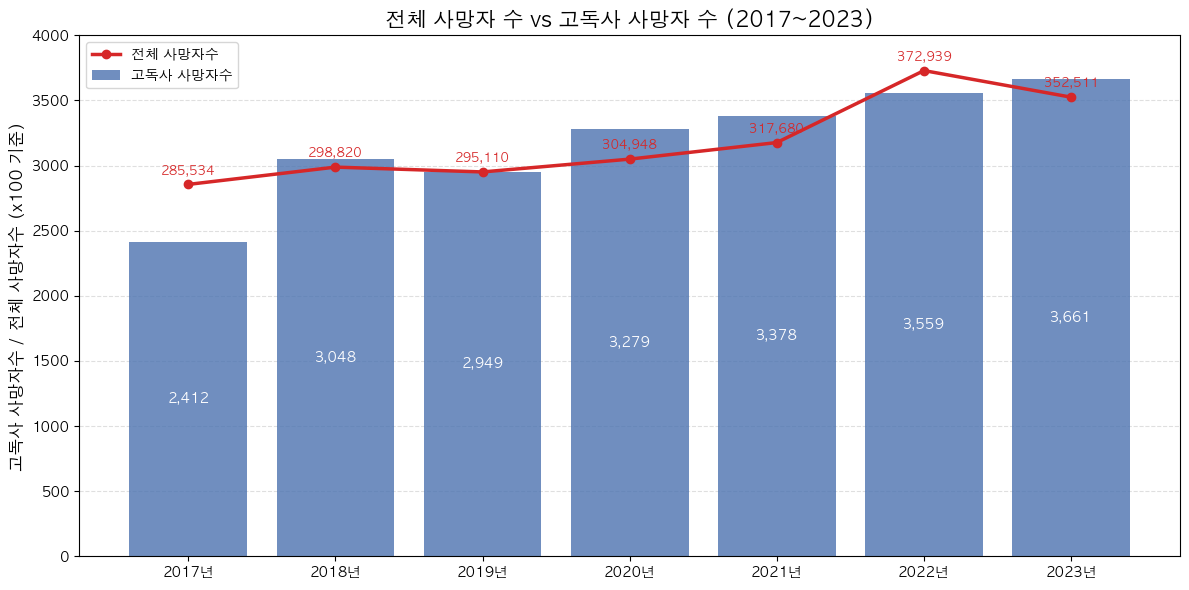

In [60]:

lonely_total_melted['고독사 사망자수'] = lonely_total_melted['고독사 사망자수'].astype(int)
total_melted['전체 사망자수'] = total_melted['전체 사망자수'].astype(int)

# 연도 리스트
years = lonely_total_melted['연도'].tolist()
years = [f"{year}년" for year in years]
lonely = lonely_total_melted['고독사 사망자수'].tolist()
total = total_melted['전체 사망자수'].tolist()

fig, ax = plt.subplots(figsize=(12, 6))

# 고독사 막대그래프
bars = ax.bar(years, lonely, color='#4C72B0', alpha=0.8, label='고독사 사망자수', zorder=2)
for bar, val in zip(bars, lonely):
    bar_x_center = bar.get_x() + bar.get_width() / 2
    ax.text(bar_x_center, val / 2, f'{val:,}', ha='center', va='center', fontsize=10, color='white')

# 전체 사망자 꺾은선 그래프
scaled_total = [v / 100 for v in total]
ax.plot(years, scaled_total, color='#D62728', marker='o', linewidth=2.5, label='전체 사망자수', zorder=3)
for i, val in enumerate(scaled_total):
    ax.text(years[i], val + 60, f'{total[i]:,}', ha='center', va='bottom', fontsize=9, color='#D62728')

# 축/타이틀/범례 설정
ax.set_ylabel('고독사 사망자수 / 전체 사망자수 (x100 기준)', fontsize=12)
ax.set_title('전체 사망자 수 vs 고독사 사망자 수 (2017~2023)', fontsize=15)
ax.set_ylim(0, 4000)
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()